## Task 4 : Next Word Prediction

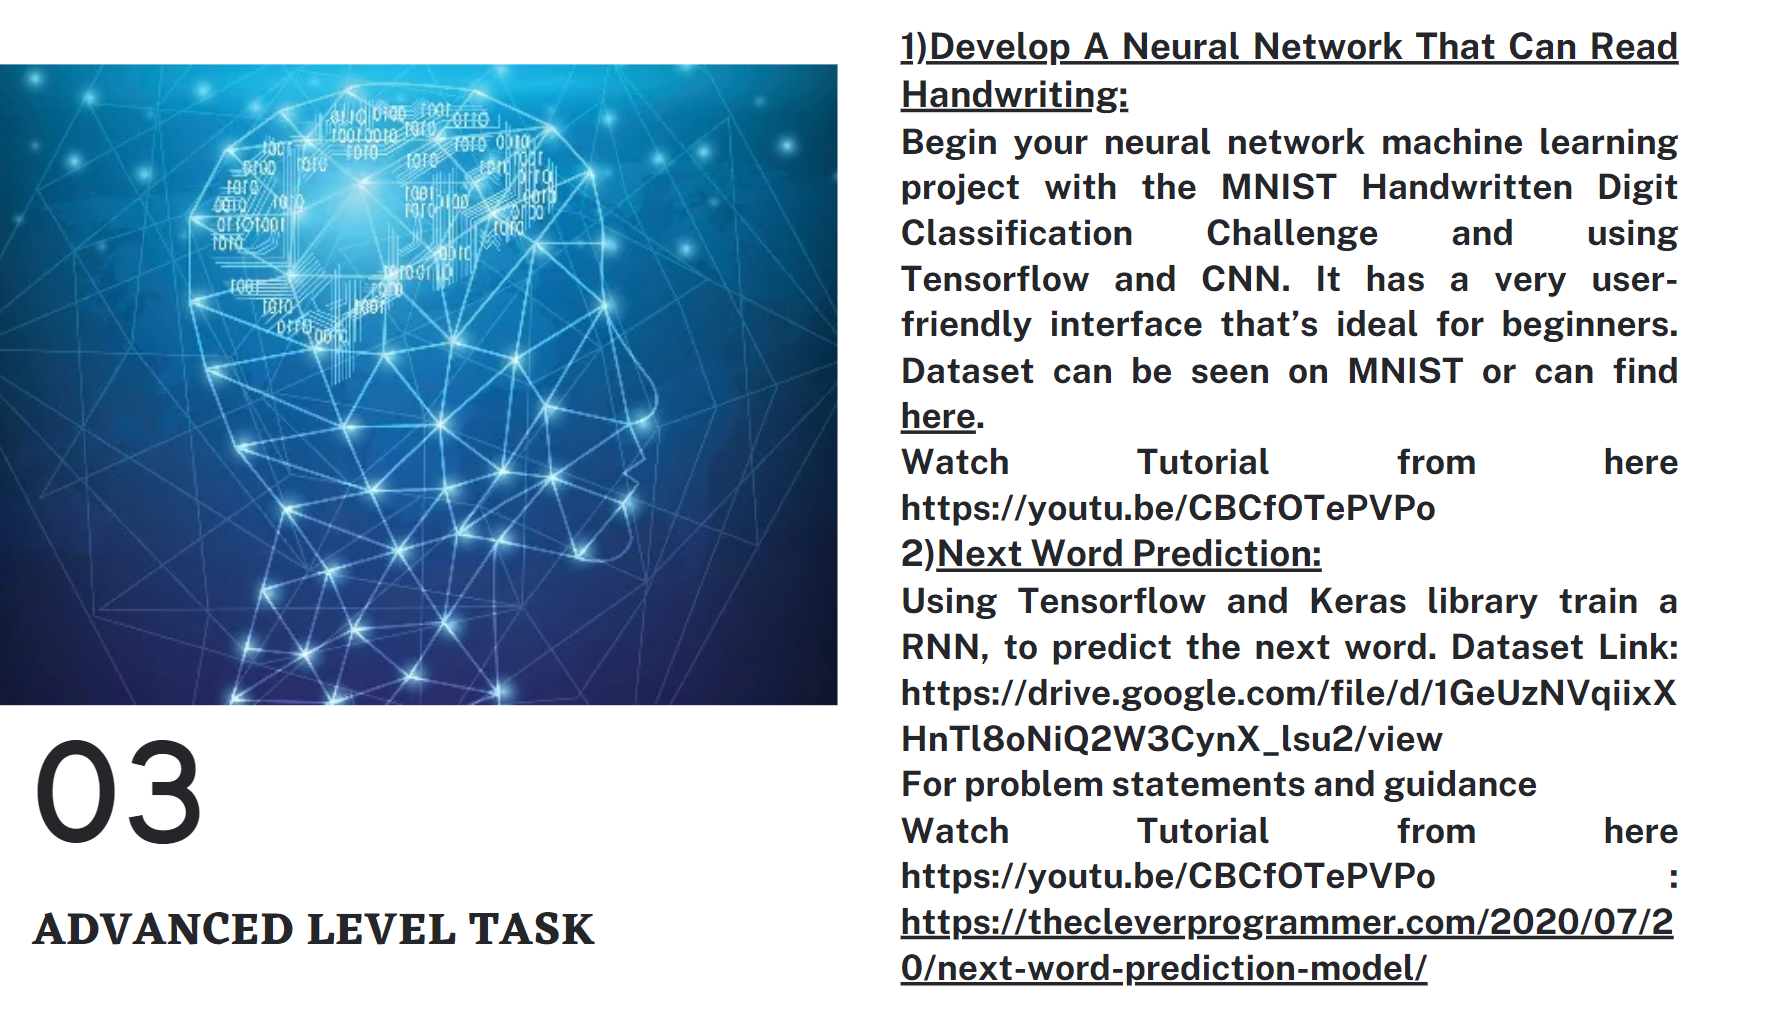

In [1]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

Using TensorFlow backend.
c:\users\analy\miniconda3\envs\vobject\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\analy\miniconda3\envs\vobject\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\analy\miniconda3\envs\vobject\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\analy\miniconda3\envs\vobject

In [2]:
path = "Predict_Data.txt" 
text = open(path, encoding="utf8").read().lower()
print('corpus length: ', len(text))

corpus length:  581888


In [6]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)
words

['project',
 'gutenberg',
 's',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doyle',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'net',
 'title',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'author',
 'arthur',
 'conan',
 'doyle',
 'release',
 'date',
 'november',
 '29',
 '2002',
 'ebook',
 '1661',
 'last',
 'updated',
 'may',
 '20',
 '2019',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf',
 '8',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'produced',
 'by',
 'an',
 'ano

In [7]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [8]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [9]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype = bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype = bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [10]:
print(X[0][0])

[False False False ... False False False]


In [11]:
model = Sequential()
model.add(LSTM(128, input_shape = (WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

W1130 12:38:27.919587 15044 deprecation_wrapper.py:119] From c:\users\analy\miniconda3\envs\vobject\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1130 12:38:27.997385 15044 deprecation_wrapper.py:119] From c:\users\analy\miniconda3\envs\vobject\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1130 12:38:28.044152 15044 deprecation_wrapper.py:119] From c:\users\analy\miniconda3\envs\vobject\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [12]:
optimizer = RMSprop(lr=0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
history = model.fit(X,Y,validation_split = 0.05, batch_size = 128, epochs = 2, shuffle = True).history

W1130 12:38:29.342571 15044 deprecation_wrapper.py:119] From c:\users\analy\miniconda3\envs\vobject\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1130 12:38:29.349506 15044 deprecation_wrapper.py:119] From c:\users\analy\miniconda3\envs\vobject\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W1130 12:38:29.479269 15044 deprecation.py:323] From c:\users\analy\miniconda3\envs\vobject\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1130 12:38:30.078400 15044 deprecation_wrapper.py:119] From c:\users\analy\miniconda3\envs\vobject\lib\site-packages\keras\backend\tensorflow_backend.py:986: The 

Train on 103759 samples, validate on 5462 samples
Epoch 1/2
103759/103759 [==============================] - 51s 488us/step - loss: 6.0111 - acc: 0.1070 - val_loss: 7.0278 - val_acc: 0.1067
Epoch 2/2
103759/103759 [==============================] - 45s 433us/step - loss: 5.7359 - acc: 0.1477 - val_loss: 7.9561 - val_acc: 0.0998


In [13]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

In [14]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [15]:
def sample(preds, top_n = 3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [16]:
def predict_completions(text, n=3):
    if text =="":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose = 0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [17]:
quotes = [
    "Attitude is a little thing that makes a big difference.",
    "That which does not kill us makes us stronger.",
    "Light the candle instead of cursuing darkness.",
    "Are you lost baby girl?",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

In [18]:
for q in quotes:
    seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
    print("Sequence: ", seq)
    print("\nnext possible words: ", predict_completions(seq, 5))

Sequence:  attitude is a little thing
attitude
is
a
little
thing

next possible words:  ['i', 'said', 'for', 'but', 'and']
Sequence:  that which does not kill
that
which
does
not
kill

next possible words:  ['to', 'the', 'and', 'a', 'my']
Sequence:  light the candle instead of
light
the
candle
instead
of

next possible words:  ['the', 'his', 'my', 'those', 'holmes']
Sequence:  are you lost baby girl
are
you
lost
baby
girl

next possible words:  ['and', 'said', 'for', 'i', 'but']
Sequence:  it is hard enough to
it
is
hard
enough
to

next possible words:  ['be', 'see', 'do', 'tell', 'give']


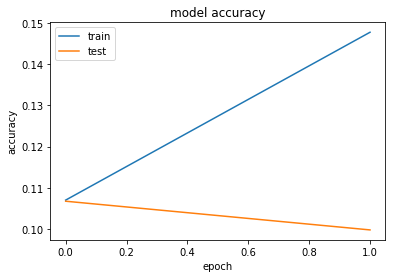

In [19]:
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')

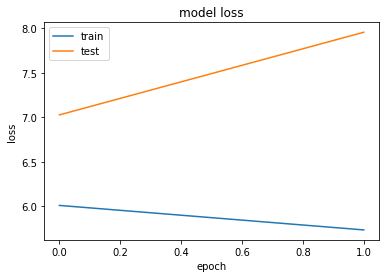

In [20]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')